# Assignment 3

### Bank Marketing Data Set (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

### Description: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The dataset has total 20 features, and the target variable is a binary variable(yes/no) indicating whether the client subscribed a term deposit or not

In [492]:
import pandas as pd
from sklearn import tree

In [493]:
data = pd.read_csv("/Users/purvank/Downloads/bank/bank-full.csv",sep=';')

In [494]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [495]:
del data['job']

In [496]:
target = data['y']
data = pd.get_dummies(data[data.columns.difference(['y'])])
data['y'] = target

In [497]:
from sklearn.preprocessing import MultiLabelBinarizer
lb = MultiLabelBinarizer()
data['y'] = lb.fit_transform(data['y'])

In [498]:
data.head()

,age,balance,campaign,day,duration,pdays,previous,contact_cellular,contact_telephone,contact_unknown,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,1,5,261,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,44,29,1,5,151,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,33,2,1,5,76,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,1,5,92,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,33,1,1,5,198,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [499]:
data.shape

(45211, 40)

In [500]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
age                    45211 non-null int64
balance                45211 non-null int64
campaign               45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
contact_cellular       45211 non-null uint8
contact_telephone      45211 non-null uint8
contact_unknown        45211 non-null uint8
default_no             45211 non-null uint8
default_yes            45211 non-null uint8
education_primary      45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
education_unknown      45211 non-null uint8
housing_no             45211 non-null uint8
housing_yes            45211 non-null uint8
loan_no                45211 non-null uint8
loan_yes               45211 non-null uint8
marital_div

In [501]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data[data.columns.difference(['y'])],data['y'],train_size=0.67)

## Depth 1

In [502]:
tree1 = tree.DecisionTreeClassifier(max_depth=1,class_weight="balanced")
tree1.fit(X_train,Y_train)
pred_train = tree1.predict(X_train)
pred_test = tree1.predict(X_test)

In [503]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## Evaluation on Train Data

In [504]:
accuracy = accuracy_score(Y_train,pred_train)
auc = roc_auc_score(Y_train,pred_train)
print ("Accuracy on training data: %f"%accuracy)
print ("AUC on training data: %f"%auc)

Accuracy on training data: 0.669671
AUC on training data: 0.727270


## Evaluation on Test Data

In [505]:
accuracy = accuracy_score(Y_test,pred_test)
auc = roc_auc_score(Y_test,pred_test)
print ("Accuracy on testing data: %f"%accuracy)
print ("AUC on testing data: %f"%auc)

Accuracy on testing data: 0.662936
AUC on testing data: 0.707054


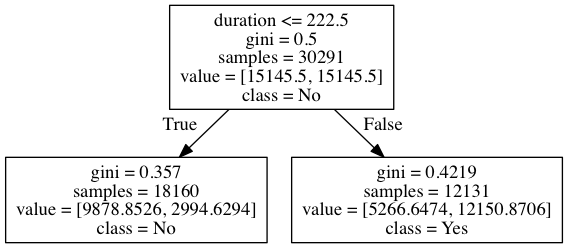

In [506]:
from graphviz import Source
tree_viz = Source( tree.export_graphviz(tree1, out_file=None, feature_names=X_train.columns,class_names=['No','Yes']))
pic = tree_viz.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(pic)
from IPython.display import Image
Image(pic)

## Depth 2

In [507]:
tree2 = tree.DecisionTreeClassifier(max_depth=2,class_weight="balanced")
tree2.fit(X_train,Y_train)
pred_train = tree2.predict(X_train)
pred_test = tree2.predict(X_test)

In [508]:
accuracy = accuracy_score(Y_train,pred_train)
auc = roc_auc_score(Y_train,pred_train)
print ("Accuracy on training data: %f"%accuracy)
print ("AUC on training data: %f"%auc)

Accuracy on training data: 0.667987
AUC on training data: 0.748684


In [509]:
accuracy = accuracy_score(Y_test,pred_test)
auc = roc_auc_score(Y_test,pred_test)
print ("Accuracy on testing data: %f"%accuracy)
print ("AUC on testing data: %f"%auc)

Accuracy on testing data: 0.664142
AUC on testing data: 0.736509


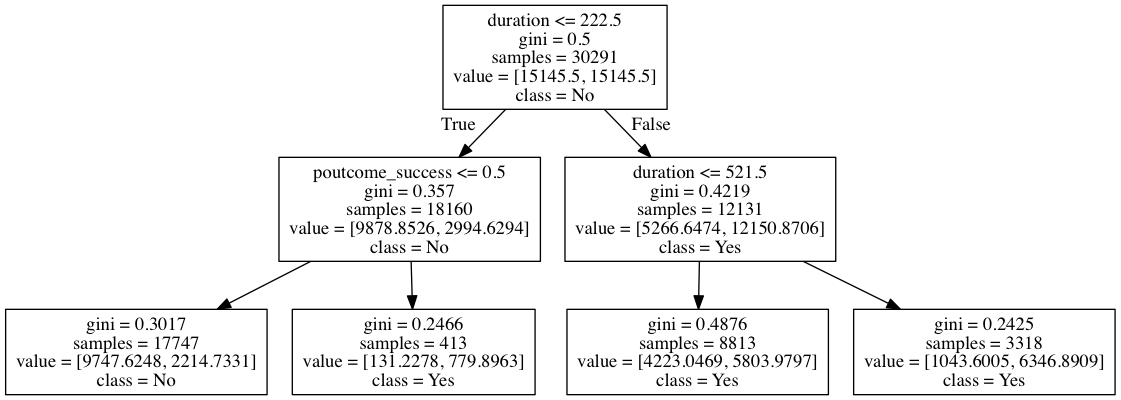

In [510]:
from graphviz import Source
tree_viz = Source( tree.export_graphviz(tree2, out_file=None, feature_names=X_train.columns,class_names=['No','Yes']))
pic = tree_viz.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(pic)
from IPython.display import Image
Image(pic)

## Depth 3

In [511]:
tree3 = tree.DecisionTreeClassifier(max_depth=3,class_weight="balanced")
tree3.fit(X_train,Y_train)
pred_train = tree3.predict(X_train)
pred_test = tree3.predict(X_test)

In [512]:
accuracy = accuracy_score(Y_train,pred_train)
auc = roc_auc_score(Y_train,pred_train)
print ("Accuracy on training data: %f"%accuracy)
print ("AUC on training data: %f"%auc)

Accuracy on training data: 0.742663
AUC on training data: 0.794260


In [513]:
accuracy = accuracy_score(Y_test,pred_test)
auc = roc_auc_score(Y_test,pred_test)
print ("Accuracy on testing data: %f"%accuracy)
print ("AUC on testing data: %f"%auc)

Accuracy on testing data: 0.738740
AUC on testing data: 0.778110


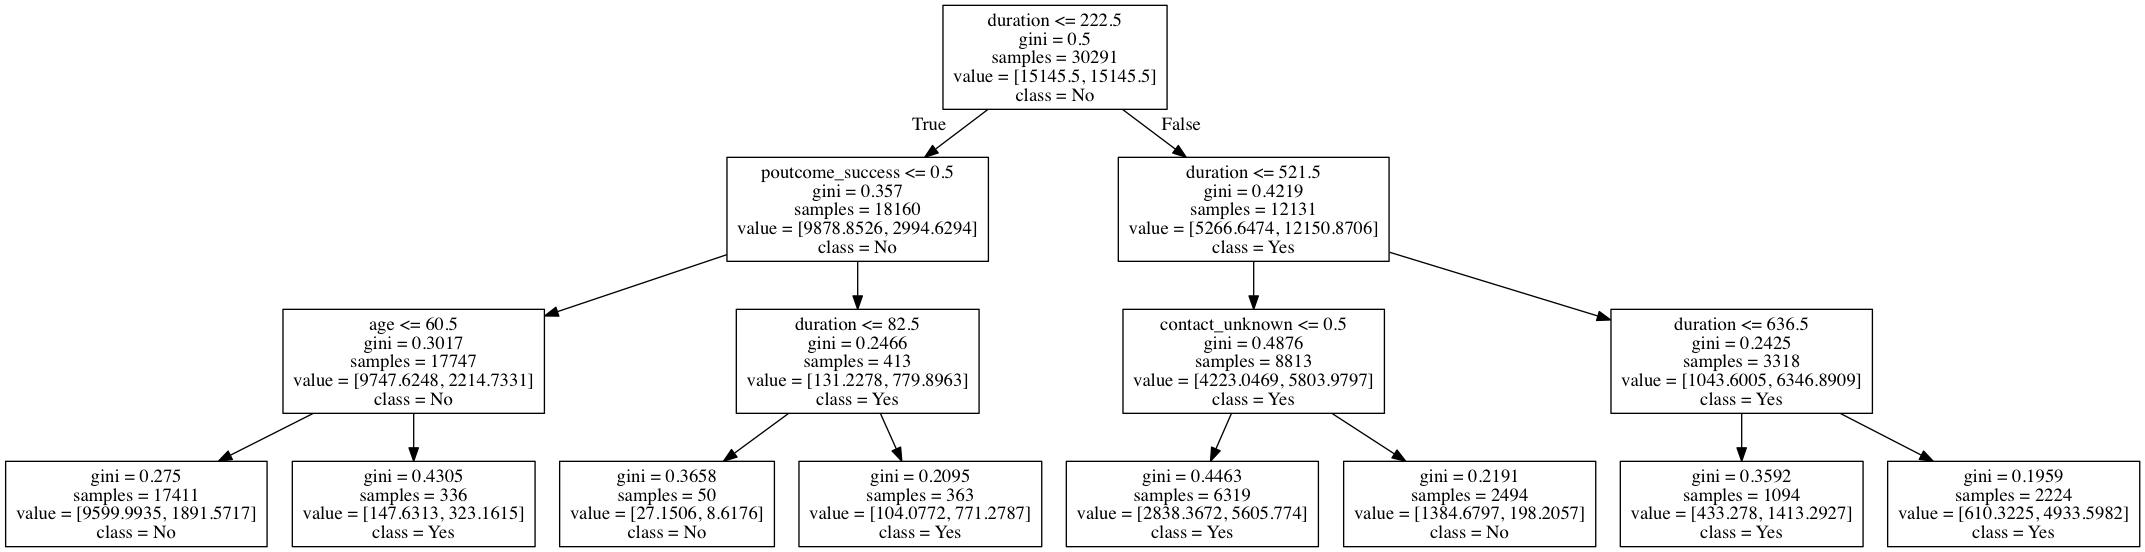

In [514]:
from graphviz import Source
tree_viz = Source( tree.export_graphviz(tree3, out_file=None, feature_names=X_train.columns,class_names=['No','Yes']))
pic = tree_viz.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(pic)
from IPython.display import Image
Image(pic)

## Depth 4

In [515]:
tree4 = tree.DecisionTreeClassifier(max_depth=4,class_weight="balanced")
tree4.fit(X_train,Y_train)
pred_train = tree4.predict(X_train)
pred_test = tree4.predict(X_test)

In [516]:
accuracy = accuracy_score(Y_train,pred_train)
auc = roc_auc_score(Y_train,pred_train)
print ("Accuracy on training data: %f"%accuracy)
print ("AUC on training data: %f"%auc)

Accuracy on training data: 0.743323
AUC on training data: 0.801183


In [517]:
accuracy = accuracy_score(Y_test,pred_test)
auc = roc_auc_score(Y_test,pred_test)
print ("Accuracy on testing data: %f"%accuracy)
print ("AUC on testing data: %f"%auc)

Accuracy on testing data: 0.739611
AUC on testing data: 0.784944


## Depth 5

In [518]:
tree5 = tree.DecisionTreeClassifier(max_depth=5,class_weight="balanced")
tree5.fit(X_train,Y_train)
pred_train = tree5.predict(X_train)
pred_test = tree5.predict(X_test)

In [519]:
accuracy = accuracy_score(Y_train,pred_train)
auc = roc_auc_score(Y_train,pred_train)
print ("Accuracy on training data: %f"%accuracy)
print ("AUC on training data: %f"%auc)

Accuracy on training data: 0.821069
AUC on training data: 0.820197


In [520]:
accuracy = accuracy_score(Y_test,pred_test)
auc = roc_auc_score(Y_test,pred_test)
print ("Accuracy on testing data: %f"%accuracy)
print ("AUC on testing data: %f"%auc)

Accuracy on testing data: 0.815214
AUC on testing data: 0.807122


## Depth 6

In [521]:
tree6 = tree.DecisionTreeClassifier(max_depth=6,class_weight="balanced")
tree6.fit(X_train,Y_train)
pred_train = tree6.predict(X_train)
pred_test = tree6.predict(X_test)

In [522]:
accuracy = accuracy_score(Y_train,pred_train)
auc = roc_auc_score(Y_train,pred_train)
print ("Accuracy on training data: %f"%accuracy)
print ("AUC on training data: %f"%auc)

Accuracy on training data: 0.810604
AUC on training data: 0.831083


In [523]:
accuracy = accuracy_score(Y_test,pred_test)
auc = roc_auc_score(Y_test,pred_test)
print ("Accuracy on testing data: %f"%accuracy)
print ("AUC on testing data: %f"%auc)

Accuracy on testing data: 0.806233
AUC on testing data: 0.810559


## Conclusion

### - The data has a class imbalance problem, so I am using the class_weight="balanced" parameter in the decisiontree classifier. It will give two classes weights based on n_samples / (n_classes * np.bincount(y)). It basically means replicating the smaller class until you have as many samples as in the larger one, but in an implicit way.
### - For depth 1, the tree is using "duration" as the splitting feature. when, I increased the depth to two, tree is still using the "duration" as the root, and on the second level it's using pout_come and duration as a splitting features. In the duration features defines the last contact duration (in seconds), this attribute highly affects the target class because if the duration is 0 then y = 'No'. Yet, the duration is not known before the call is performed. Also, after the end of the call y is obviously known. For depth 3, the tree is using the same features as in the tree with a depth tree, in the 3rd level tree is using two new features month = march, and contact = unknown.
### - The accuracy and roc_auc score on the training data increases as the depth of the tree increases, the tree is fitting the training data well because we trained the deicision tree on the same data. As for the testing data the accuracy and roc_auc_score is increasing as we are increasing the depths of the tree.